In [1]:
from fastai.conv_learner import *
from fastai.dataset import *
from pathlib import Path
import json
from PIL import ImageDraw,ImageFont
from matplotlib import patches, patheffects

In [2]:
PATH=Path('../../datasets/VOC2007/')

In [3]:
list(PATH.iterdir())

[PosixPath('../../datasets/VOC2007/ImageSets'),
 PosixPath('../../datasets/VOC2007/SegmentationClass'),
 PosixPath('../../datasets/VOC2007/.DS_Store'),
 PosixPath('../../datasets/VOC2007/SegmentationObject'),
 PosixPath('../../datasets/VOC2007/PASCAL_VOC'),
 PosixPath('../../datasets/VOC2007/Annotations'),
 PosixPath('../../datasets/VOC2007/JPEGImages')]

In [4]:
trn_json=json.load((PATH/'PASCAL_VOC/pascal_train2007.json').open())

In [5]:
trn_json.keys() 

dict_keys(['images', 'type', 'annotations', 'categories'])

In [6]:
ANNOTATION,IMAGES,CATEGORIES=['annotations','images','categories']
trn_json[ANNOTATION][:2]

[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0}]

In [7]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX='file_name','id','image_id','category_id','bbox'
trn_fns=dict((o[ID],o[FILE_NAME]) for o in trn_json[IMAGES])
cats=dict((o[ID],o['name']) for o in trn_json[CATEGORIES])
trn_ids=[o[ID] for o in trn_json[IMAGES]]

In [8]:
JPEGS='JPEGImages'

In [9]:
IMG_PATH=PATH/JPEGS

In [10]:
trn_anno=collections.defaultdict(lambda:[])
for o in trn_json[ANNOTATION]:
    if not o['ignore']:
        bb=o[BBOX]
        bb=np.array([bb[1],bb[0],bb[3]+bb[1]-1,bb[2]+bb[0]-1])
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        

In [11]:
trn_anno[12]

[(array([ 96, 155, 269, 350]), 7)]

In [12]:
trn_json[ANNOTATION][0]

{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
 'area': 34104,
 'iscrowd': 0,
 'image_id': 12,
 'bbox': [155, 96, 196, 174],
 'category_id': 7,
 'id': 1,
 'ignore': 0}

In [13]:
trn_json[IMAGES][:4]

[{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
 {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17},
 {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23},
 {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26}]

In [14]:
# Bounding box in JSON : (col,row,width,height)

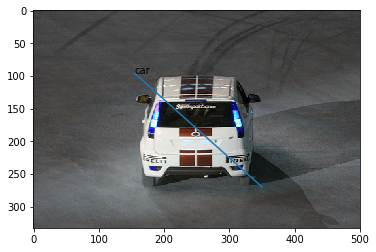

In [15]:
import cv2
import matplotlib.pyplot as plt
im=cv2.imread('../../datasets/VOC2007/JPEGImages/000012.jpg')
plt.text(155,96,'car')
p=patches.Rectangle((155,96),100,100)
plt.plot([155,350],[96,270])
plt.imshow(im)

In [16]:
trn_anno[trn_ids[0]]

[(array([ 96, 155, 269, 350]), 7)]

In [17]:
def bb_hw(a):return np.array([a[1],a[0],a[3]-a[1],a[2]-a[0]])

In [19]:
im0=trn_fns[trn_ids[0]],trn_ids[0]

In [20]:
im=open_image(IMG_PATH/im0[0])

In [21]:
def show_img(im,figsize=None,ax=None):
    fig,ax=plt.subplots(figsize=figsize)
    ax.axis('off')
    ax.imshow(im)     
    return ax

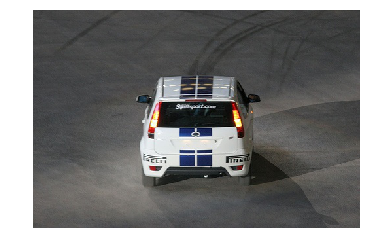

In [22]:
i=show_img(im)

In [23]:
def draw_outline(o,lw):
    o.set_path_effects([patheffects.Stroke(linewidth=lw,
    foreground='black'),patheffects.Normal()])

In [24]:
def draw_rec(ax,b):
    patch=ax.add_patch(patches.Rectangle(b[:2],*b[-2:],
                    fill=False,edgecolor='white',lw=2))
    draw_outline(patch,4)

In [25]:
def draw_text(ax,xy,txt,sz=14):
    text=ax.text(*xy,txt,verticalalignment='top',color='white',
                fontsize=sz,weight='bold')
    draw_outline(text,1)

In [26]:
trn_anno[im0[1]][0][0]

array([ 96, 155, 269, 350])

In [27]:
cats[7]

'car'

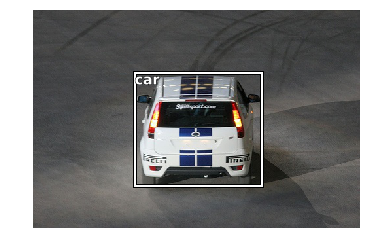

In [28]:
ax=show_img(im)
b=bb_hw(trn_anno[im0[1]][0][0])
draw_rec(ax,b)
draw_text(ax,b[:2],cats[trn_anno[im0[1]][0][1]])

In [29]:
trn_fns

{12: '000012.jpg',
 17: '000017.jpg',
 23: '000023.jpg',
 26: '000026.jpg',
 32: '000032.jpg',
 33: '000033.jpg',
 34: '000034.jpg',
 35: '000035.jpg',
 36: '000036.jpg',
 42: '000042.jpg',
 44: '000044.jpg',
 47: '000047.jpg',
 48: '000048.jpg',
 61: '000061.jpg',
 64: '000064.jpg',
 66: '000066.jpg',
 73: '000073.jpg',
 77: '000077.jpg',
 78: '000078.jpg',
 83: '000083.jpg',
 89: '000089.jpg',
 91: '000091.jpg',
 104: '000104.jpg',
 112: '000112.jpg',
 122: '000122.jpg',
 129: '000129.jpg',
 133: '000133.jpg',
 134: '000134.jpg',
 138: '000138.jpg',
 140: '000140.jpg',
 141: '000141.jpg',
 147: '000147.jpg',
 153: '000153.jpg',
 154: '000154.jpg',
 159: '000159.jpg',
 161: '000161.jpg',
 162: '000162.jpg',
 163: '000163.jpg',
 164: '000164.jpg',
 171: '000171.jpg',
 173: '000173.jpg',
 174: '000174.jpg',
 187: '000187.jpg',
 189: '000189.jpg',
 192: '000192.jpg',
 193: '000193.jpg',
 194: '000194.jpg',
 198: '000198.jpg',
 200: '000200.jpg',
 207: '000207.jpg',
 209: '000209.jpg',
 2

In [30]:
def draw_im(im,ann):
    ax=show_img(im)
    for b,c in ann:
        b=bb_hw(b)
        draw_rec(ax,b)
        draw_text(ax,b[:2],cats[c])

In [31]:
def draw_idx(i):
    im_a=trn_anno[i]
    im=open_image(IMG_PATH/trn_fns[i])
    draw_im(im,im_a)

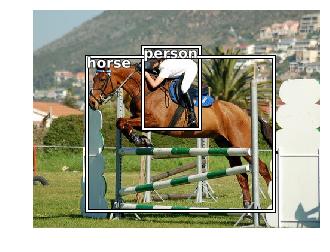

In [32]:
draw_idx(17)

# Larget item classifier

In [33]:
def get_lrs(a,b):
    if not b:raise Exception() 
    b=sorted(b,key=lambda x: np.product(x[0][-2:]-x[0][:2]),reverse=True)
    return b[0]

In [34]:
trn_lrg_anno={a: get_lrs(a,b) for a,b in trn_anno.items()}

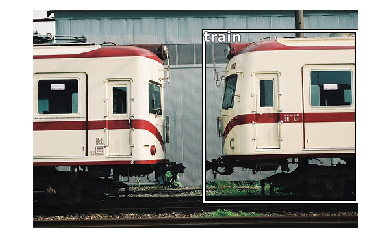

In [35]:
im=open_image(IMG_PATH/trn_fns[trn_ids[9]])
draw_im(im,[trn_lrg_anno[trn_ids[9]]])

In [46]:
(PATH/'tmp').mkdir(exist_ok=True)

In [47]:
! ls {PATH}

Annotations        JPEGImages         SegmentationClass  tmp
ImageSets          PASCAL_VOC         SegmentationObject


In [50]:
trn_lrg_anno

{12: (array([ 96, 155, 269, 350]), 7),
 17: (array([ 77,  89, 335, 402]), 13),
 23: (array([  1,   2, 461, 242]), 15),
 26: (array([124,  89, 211, 336]), 7),
 32: (array([ 77, 103, 182, 374]), 1),
 33: (array([106,   8, 262, 498]), 1),
 34: (array([166, 115, 399, 359]), 19),
 35: (array([ 97, 217, 317, 464]), 15),
 36: (array([ 78,  26, 343, 318]), 12),
 42: (array([ 31, 262, 294, 499]), 19),
 44: (array([  0,   0, 329, 369]), 9),
 47: (array([  0,  14, 311, 458]), 7),
 48: (array([  0,   1, 499, 301]), 15),
 61: (array([ 10, 273, 278, 436]), 4),
 64: (array([ 22,   0, 499, 450]), 3),
 66: (array([181, 241, 258, 273]), 15),
 73: (array([142, 120, 459, 374]), 16),
 77: (array([  0,   1, 332, 305]), 8),
 78: (array([ 74,  14, 411, 474]), 12),
 83: (array([ 32, 108, 308, 446]), 7),
 89: (array([ 50,  21, 290, 316]), 9),
 91: (array([240, 124, 283, 194]), 7),
 104: (array([  6,   1, 332, 282]), 15),
 112: (array([173,  69, 327, 276]), 12),
 122: (array([ 19,  35, 473, 429]), 8),
 129: (arr

In [51]:
CSV=PATH/'tmp/lrg.csv'
df=pd.DataFrame({'fn':[trn_fns[o] for o in trn_ids],
            'cat':[cats[trn_lrg_anno[o][1]] for o in trn_ids]},columns=['fn','cat'])
df.to_csv(CSV,index=False)

In [53]:
f_model=resnet34
sz=224
bs=64

In [55]:
tfms=tfms_from_model(f_model,sz,aug_tfms=transforms_side_on,crop_type=CropType.NO)
md=ImageClassifierData.from_csv(PATH,JPEGS,CSV,tfms=tfms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


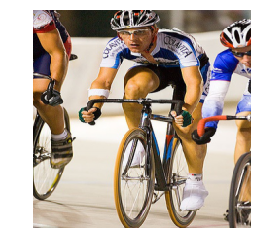

In [57]:
x,y=next(iter(md.val_dl))
show_img(md.val_ds.denorm(to_np(x))[0])

In [62]:
learn=ConvLearner.pretrained(f_model,md,metrics=[accuracy])
learn.opt_fn=optim.Adam

In [63]:
learn.lr_find()

 91%|█████████ | 29/32 [08:26<00:52, 17.45s/it, loss=15.5]

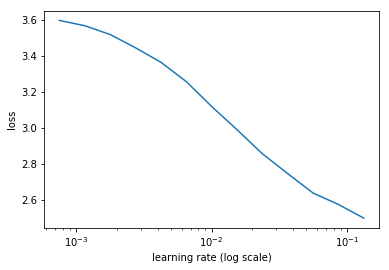

In [64]:
learn.sched.plot()

In [71]:
learn.fit(1e-2,1,cycle_mult=1,cycle_len=1)

epoch      trn_loss   val_loss   accuracy                 
    0      2.082554   1.388684   0.792     


[array([1.38868]), 0.792]

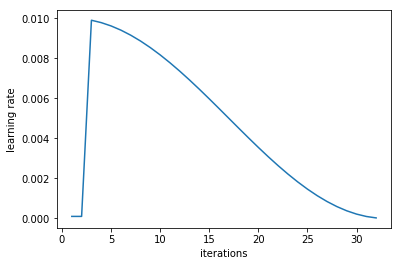

In [72]:
learn.sched.plot_lr()

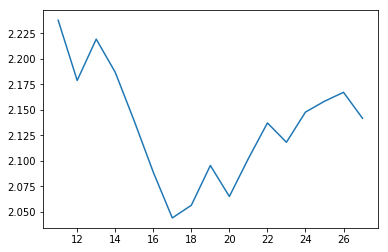

In [73]:
learn.sched.plot_loss()

In [74]:
learn.save('clas_one')

In [75]:
learn.load('clas_one')